In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.shape

(21613, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

NameError: name 'df' is not defined

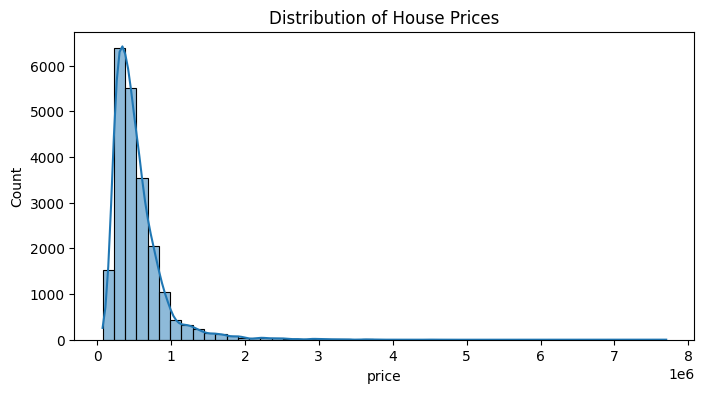

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.show()

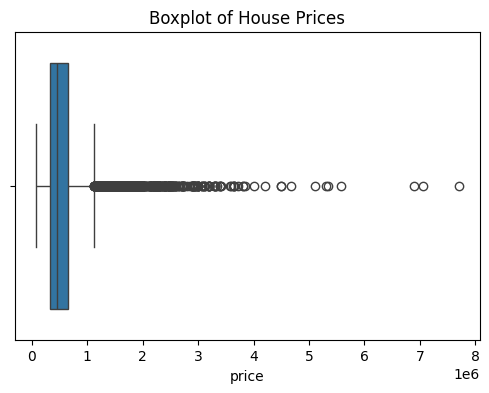

In [6]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["price"])
plt.title("Boxplot of House Prices")
plt.show()

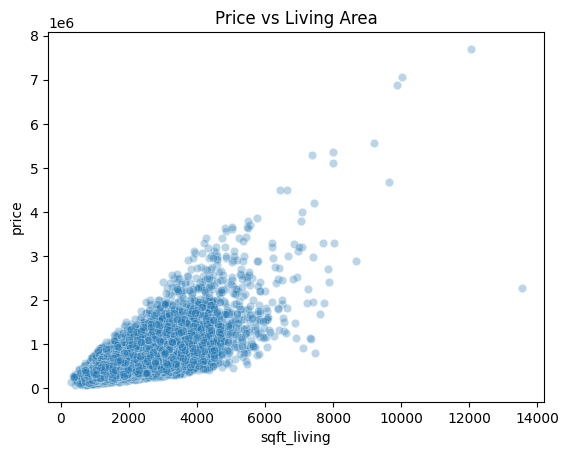

In [7]:
sns.scatterplot(x=df["sqft_living"], y=df["price"], alpha=0.3)
plt.title("Price vs Living Area")
plt.show()

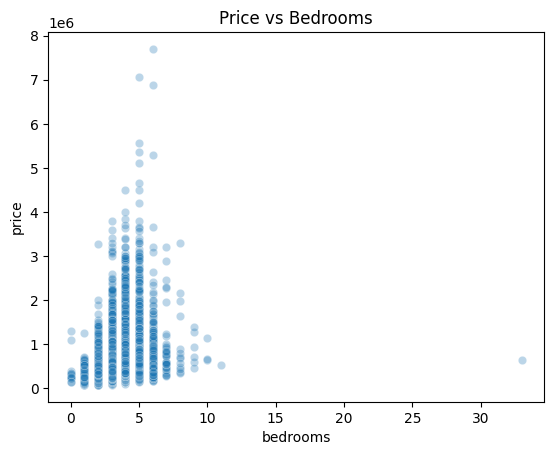

In [8]:
sns.scatterplot(x=df["bedrooms"], y=df["price"], alpha=0.3)
plt.title("Price vs Bedrooms")
plt.show()

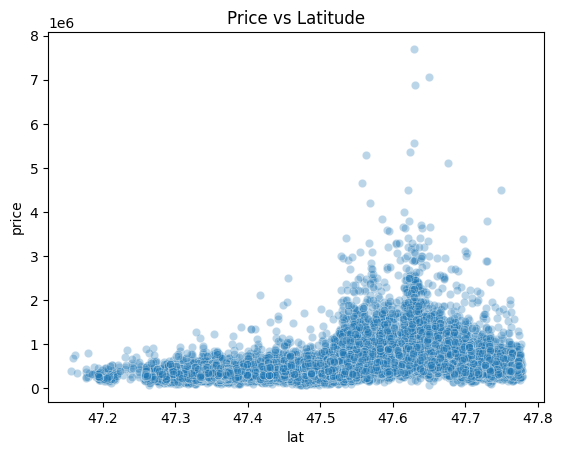

In [9]:
sns.scatterplot(x=df["lat"], y=df["price"], alpha=0.3)
plt.title("Price vs Latitude")
plt.show()

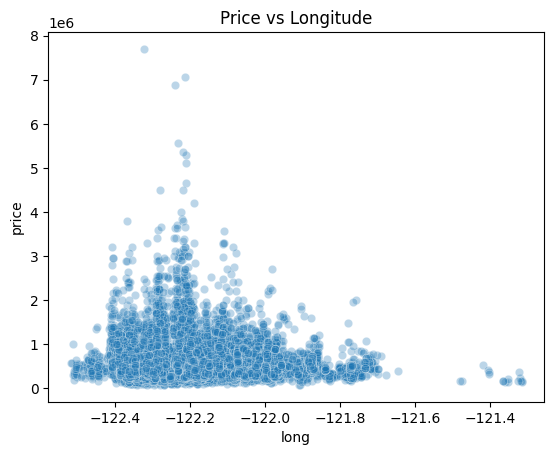

In [10]:
sns.scatterplot(x=df["long"], y=df["price"], alpha=0.3)
plt.title("Price vs Longitude")
plt.show()

In [15]:
import sys
sys.path.append("../src")

from geo_utils import haversine_distance

In [17]:
SEATTLE_LAT = 47.6097
SEATTLE_LON = -122.3331

df["dist_to_city_center_km"] = haversine_distance(
    df["lat"],
    df["long"],
    SEATTLE_LAT,
    SEATTLE_LON
)

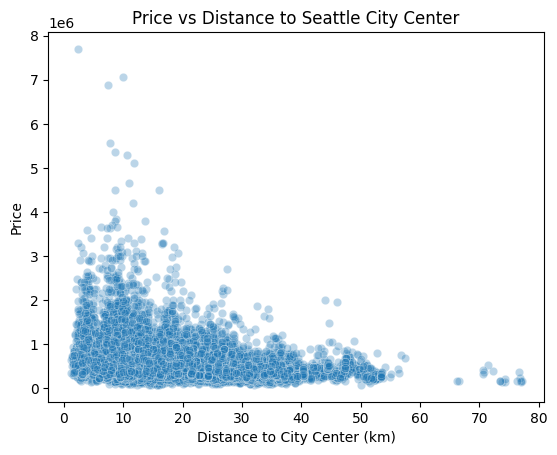

In [18]:
sns.scatterplot(
    x=df["dist_to_city_center_km"],
    y=df["price"],
    alpha=0.3
)
plt.title("Price vs Distance to Seattle City Center")
plt.xlabel("Distance to City Center (km)")
plt.ylabel("Price")
plt.show()

In [4]:
features = ["sqft_living", "bedrooms", "dist_to_city_center_km"]
X = df[features].values
y = df["price"].values.reshape(-1, 1)

# Normalize features (critical for gradient descent)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

X_norm = (X - X_mean) / X_std

# Add bias term
X_b = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]

NameError: name 'df' is not defined

In [25]:
np.random.seed(42)
w = np.random.randn(X_b.shape[1], 1)
learning_rate = 0.01
n_iterations = 1000

In [26]:
losses = []

for i in range(n_iterations):
    y_pred = X_b @ w
    error = y_pred - y

    gradients = (2 / len(y)) * (X_b.T @ error)
    w -= learning_rate * gradients

    loss = np.mean(error ** 2)
    losses.append(loss)

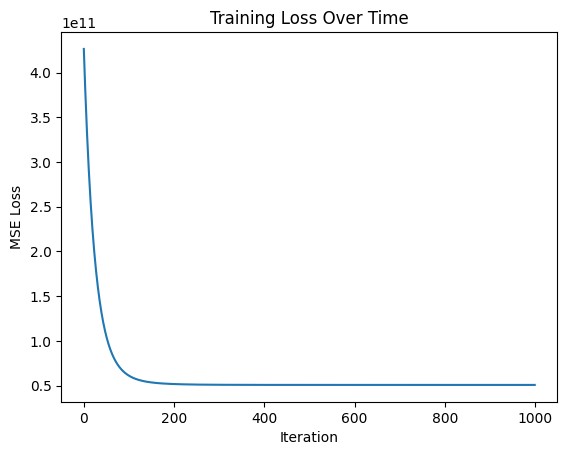

In [27]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Time")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'sklearn'

In [29]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 2.4 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/8.0 MB 2.0 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.0 MB 1.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.0 MB 1.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.1/8.0 MB 1.7 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.0 MB 1.7 MB/s eta 0:00:04
   -------------- ------------------------- 2.9/8.0 MB 1.7 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.0 MB 1.7 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.0 MB 1.8 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.0 MB 1.9 MB/s eta 0:00:03
   ---------------------- ----------------- 4.5/8.0 MB 1.8 MB/s eta 0:00:02
   ---------------------- 

In [1]:
import sklearn
sklearn.__version__

'1.8.0'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
X = df[features].values
y = df["price"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

KeyError: "['dist_to_city_center_km'] not in index"

In [15]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
import sys
sys.path.append("../src")

from geo_utils import haversine_distance

In [17]:
SEATTLE_LAT = 47.6097
SEATTLE_LON = -122.3331

df["dist_to_city_center_km"] = haversine_distance(
    df["lat"],
    df["long"],
    SEATTLE_LAT,
    SEATTLE_LON
)

In [18]:
df[["lat", "long", "dist_to_city_center_km"]].head()

,lat,long,dist_to_city_center_km
0,47.5112,-122.257,12.351848
1,47.7210,-122.319,12.420956
2,47.7379,-122.233,16.105354
3,47.5208,-122.393,10.858904
4,47.6168,-122.045,21.610393


In [19]:
features = ["sqft_living", "bedrooms", "dist_to_city_center_km"]

In [20]:
X = df[features].values
y = df["price"].values

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mse, test_mse

(49220848446.79822, 57331269791.717384)

In [22]:
df["distance_band"] = pd.cut(
    df["dist_to_city_center_km"],
    bins=[0, 10, 20, 30, 40, 100]
)

df["predicted_price"] = lr.predict(df[features].values)
df["abs_error"] = np.abs(df["predicted_price"] - df["price"])

df.groupby("distance_band")["abs_error"].mean()

C:\Users\Nithyashree C S\AppData\Local\Temp\ipykernel_27848\971486701.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("distance_band")["abs_error"].mean()


distance_band
(0, 10]      171010.516283
(10, 20]     144108.752977
(20, 30]     118519.128269
(30, 40]     108582.181907
(40, 100]    229651.180426
Name: abs_error, dtype: float64

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [24]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [25]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)

rf_train_mse, rf_test_mse

(5647479664.542719, 44652024136.58392)

In [26]:
importances = rf.feature_importances_

for f, imp in zip(features, importances):
    print(f"{f}: {imp:.3f}")

sqft_living: 0.647
bedrooms: 0.033
dist_to_city_center_km: 0.320


In [27]:
df["rf_predicted_price"] = rf.predict(df[features].values)
df["rf_abs_error"] = np.abs(df["rf_predicted_price"] - df["price"])

df.groupby("distance_band", observed=False)["rf_abs_error"].mean()

distance_band
(0, 10]      84587.880753
(10, 20]     70210.068335
(20, 30]     52126.132948
(30, 40]     31823.352094
(40, 100]    35023.339082
Name: rf_abs_error, dtype: float64